# HRF Mark 2.1

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [5]:
hrf = cv2.imread('/Users/teguhsatya/Dev/segeralulus/samples/s_hrf.jpg')
hrf_rgb = cv2.cvtColor(hrf, cv2.COLOR_BGR2RGB)
hrf_res = cv2.resize(hrf_rgb, (int(hrf_rgb.shape[1]*50/100), int(hrf_rgb.shape[0]*50/100)), cv2.INTER_AREA)
wlim = 135
hrfg = cv2.cvtColor(hrf_res, cv2.COLOR_RGB2GRAY)
xmax = cv2.minMaxLoc(hrfg)[3][0]
ymax = cv2.minMaxLoc(hrfg)[3][1]
roi = hrf_res.copy()[ymax-wlim:ymax+wlim,xmax-wlim:xmax+wlim]

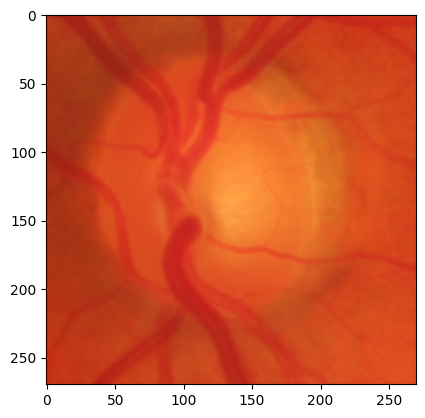

In [6]:
plt.imshow(roi)

In [10]:
def adjust_gamma(image, gamma=1.0):
    table = np.array([((i / 255.0) ** gamma) * 255
      for i in np.arange(0, 256)]).astype("uint8")

    return cv2.LUT(image, table)

In [11]:
red = roi.copy()[:,:,0]

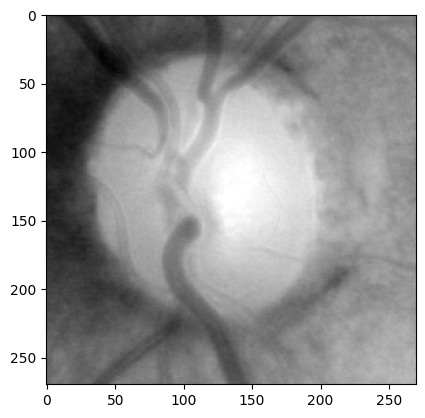

In [12]:
plt.imshow(red, 'gray')

In [19]:
redc = adjust_gamma(red, gamma=7)

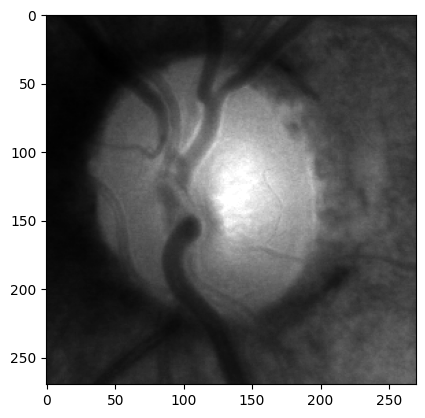

In [20]:
plt.imshow(redc, 'gray')

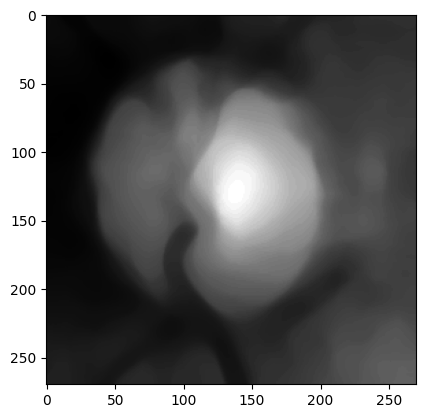

In [36]:
redmedian = cv2.medianBlur(redc.copy(), 21)
plt.imshow(redmedian, cmap='gray')

In [37]:
dilate = cv2.dilate(redmedian.copy(), kernel=np.ones((15,15), np.uint8))

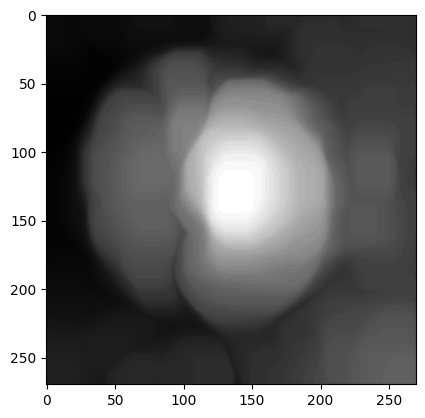

In [38]:
plt.imshow(dilate, cmap='gray')

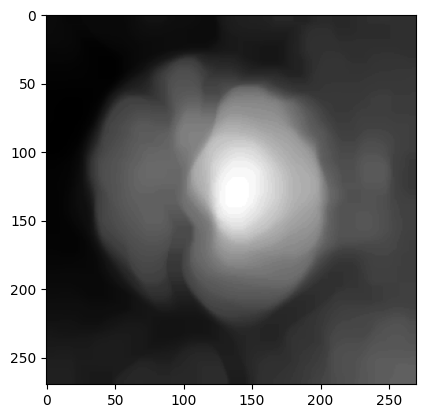

In [39]:
erosion = cv2.erode(dilate.copy(), kernel=np.ones((10,10), np.uint8))
plt.imshow(erosion, 'gray')

In [40]:
ret4,th4 = cv2.threshold(erosion.copy(),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

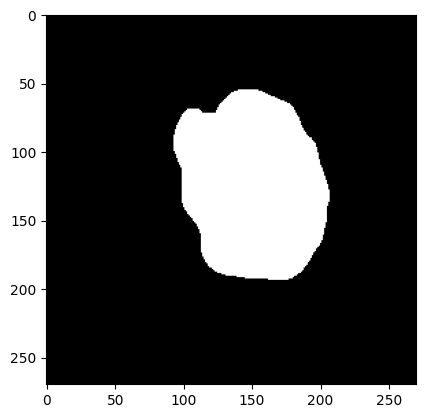

In [41]:
plt.imshow(th4, 'gray')

In [42]:
cont, hcy = cv2.findContours(th4.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

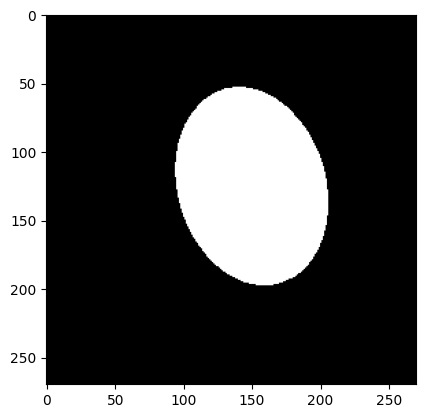

In [43]:
thhh = th4.copy()
roic = roi.copy()
for contour in cont:
    ellipse = cv2.fitEllipse(contour)
    od = np.zeros_like(thhh, dtype='uint8')
    cv2.ellipse(od, ellipse, (255, 255, 255), -1)
    cv2.ellipse(roic, ellipse, (0, 255, 0), 1, cv2.LINE_AA)
    plt.imshow(od, 'gray')

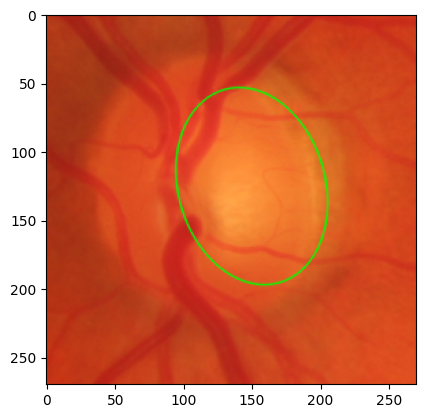

In [44]:
plt.imshow(roic)